In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [338]:
Twall =28+273.15
nstart=10
nelem = 384


In [439]:
def get_valdata(fname):
    Twall =28+273.15
    df_dns = pd.read_fwf(fname,widths=6*[18], header=None, names=['x','dummy1','dummy2','dummy3','T*','dummy4']) 
    df_dns['T']=df_dns['T*'].apply(lambda x: x*Twall -273.15)
    return df_dns

def get_numdata(fname):
    Twall =28+273.15
    df_field = pd.read_fwf(fname,widths=30*[20]) #the complete fi?eld
    df_field = df_field.rename(columns={"T": "T*",'x':"x_uncor"})
    df_field['LOD']=df_field['x_uncor'].max()
    df_field['x']  =df_field.apply(lambda x: x['x_uncor']-((nstart-1)/nelem)*x['LOD'],axis=1)
    df_field['T']  =df_field['T*'].apply(lambda x: x*Twall -273.15)
    df_wall = df_field[df_field['y']==0.5].copy()

    return df_field, df_wall


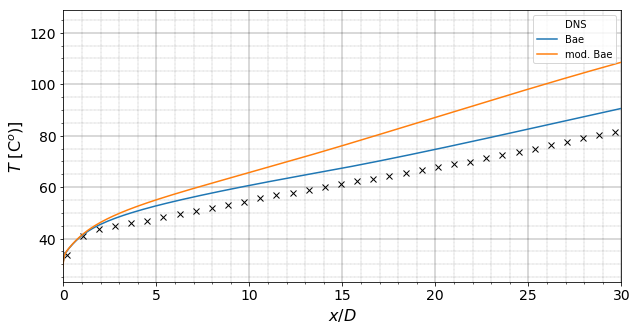

In [504]:

df_dnsB = get_valdata( "validation_data/hassan_data/caseB")
df_numfB1, df_numwB1 = get_numdata('../cC_SST_mod0_Bae.csv')
df_numfB2, df_numwB2 = get_numdata('../cC_SST_mod1_Bae.csv')


fig, ax = plt.subplots(figsize=(10,5))

df_dnsB.plot('x','T',ax=ax, color='k', marker='x',markevery=50, linestyle ='None', label='DNS')
df_numwB1.plot('x','T',ax=ax,    label='Bae')
df_numwB2.plot('x','T',ax=ax,    label='mod. Bae')

ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$T$ [C$^o$)]',fontsize=16)
ax.minorticks_on()
ax.grid(which='minor',color='k', linestyle=':', linewidth=0.3)
ax.grid(which='major',color='k', linestyle='-', linewidth=0.3)
ax.tick_params(labelsize=14)
ax.set_xbound(0,30)


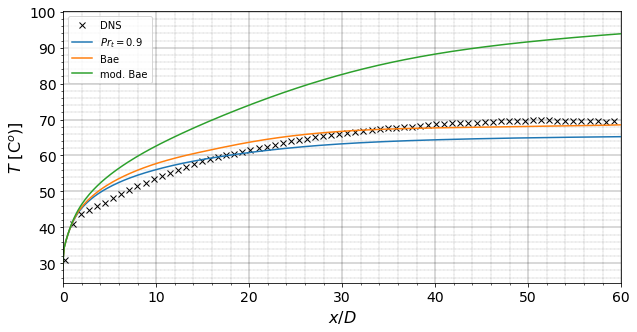

In [500]:
df_dnsA = get_valdata( "validation_data/hassan_data/caseA")
df_numfA1, df_numwA1 = get_numdata('../cA_SST_mod0_cPrt09.csv')
df_numfA2, df_numwA2 = get_numdata('../cA_SST_mod0_Bae.csv')
df_numfA3, df_numwA3 = get_numdata('../cA_SST_mod1_Bae.csv')

# df_numfA2, df_numwA2 = get_numdata('../laminarbl.csv')

fig, ax = plt.subplots(figsize=(10,5))

df_dnsA.plot('x','T',ax=ax, color='k', marker='x',markevery=50, linestyle ='None', label='DNS')
df_numwA1.plot('x','T',ax=ax,    label='$Pr_t=0.9$')
df_numwA2.plot('x','T',ax=ax,    label='Bae')
df_numwA3.plot('x','T',ax=ax,    label='mod. Bae')

ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$T$ [C$^o$)]',fontsize=16)
ax.minorticks_on()
ax.grid(which='minor',color='k', linestyle=':', linewidth=0.3)
ax.grid(which='major',color='k', linestyle='-', linewidth=0.3)
ax.tick_params(labelsize=14)
ax.set_xbound(0,60)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


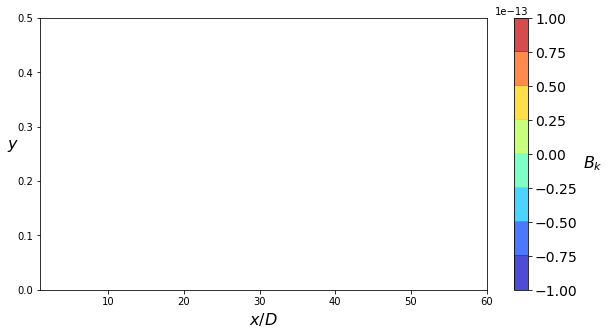

In [487]:
from matplotlib.ticker import ScalarFormatter 
df_numfB, df_numwB = get_numdata('../laminarbl.csv')

fig,ax =plt.subplots(figsize=(10,5))

df_numfB.pivot('x', 'y')
dftmp = df_numfB[df_numfB['x']>0][df_numfB['x']<=80][['x','y','gk']]
hdfpivot=dftmp.pivot('x', 'y')

X=hdfpivot.columns.levels[1].values
Y=hdfpivot.index.values
Z=hdfpivot.values
Xi,Yi = np.meshgrid(X, Y)
CS = ax.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet);
CB = fig.colorbar(CS)
ax.set_xbound(1,60)
ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$y$',fontsize=16,rotation=0)
CB.set_label("$B_k$",rotation=0, fontsize=16, labelpad=15)

#lines2, labels2 = ax21.get_legend_handles_labels()
# ax21.get_legend().remove()
CB.ax.tick_params(labelsize=14)
CB.formatter.set_powerlimits((0, 0))
CB.update_ticks()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


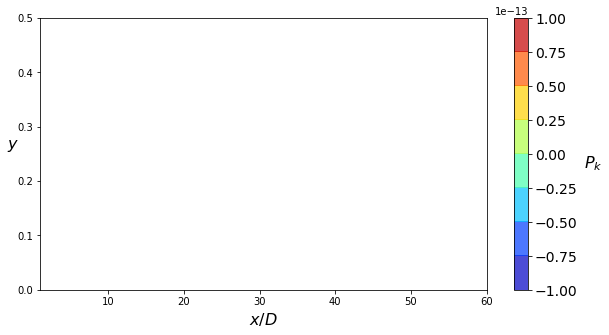

In [488]:
fig,ax =plt.subplots(figsize=(10,5))

df_numfB.pivot('x', 'y')
dftmp = df_numfB[df_numfB['x']>0][df_numfB['x']<=80][['x','y','pk']]
hdfpivot=dftmp.pivot('x', 'y')

X=hdfpivot.columns.levels[1].values
Y=hdfpivot.index.values
Z=hdfpivot.values
Xi,Yi = np.meshgrid(X, Y)
CS = ax.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet);
CB = fig.colorbar(CS)
ax.set_xbound(1,60)
ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$y$',fontsize=16,rotation=0)
CB.set_label("$P_k$",rotation=0, fontsize=16, labelpad=15)

#lines2, labels2 = ax21.get_legend_handles_labels()
# ax21.get_legend().remove()
CB.ax.tick_params(labelsize=14)
CB.formatter.set_powerlimits((0, 0))
CB.update_ticks()